In [1]:
from typing import List, Tuple
import math

In [2]:
class Matrix:
    def __init__(self, data: List[List[float]]):
        self.data = data
        self.rows = len(data)
        self.cols = len(data[0]) if self.rows > 0 else 0

    def __getitem__(self, idx):
        return self.data[idx]

    def __setitem__(self, idx, value):
        self.data[idx] = value

    def __repr__(self):
        return "\n".join(map(str, self.data))

In [3]:
def gauss_solver(A: 'Matrix', b: 'Matrix') -> List['Matrix']:
    """
    Реализация метода Гаусса для решения СЛАУ Ax = b.

    Вход:
    A: матрица коэффициентов (n×n).
    b: вектор правых частей (n×1).

    Выход:
    list[Matrix]: список базисных векторов решения системы.

    Raises:
    ValueError: если система несовместна.
    """
    n = A.rows
    if n != A.cols:
        raise ValueError("Матрица A должна быть квадратной.")
    if b.rows != n or b.cols != 1:
        raise ValueError("Размерности матрицы A и вектора b не совпадают.")

    # Создаем расширенную матрицу [A|b]
    augmented_matrix = Matrix([A[i] + b[i] for i in range(n)])

    # Прямой ход метода Гаусса
    for i in range(n):
        # Поиск ведущего элемента (максимального по модулю в текущем столбце)
        max_row = i
        for k in range(i + 1, n):
            if abs(augmented_matrix[k][i]) > abs(augmented_matrix[max_row][i]):
                max_row = k

        # Меняем строки местами, если нужно
        if augmented_matrix[max_row][i] == 0:
            raise ValueError("Система несовместна или имеет бесконечно много решений.")
        if max_row != i:
            augmented_matrix[i], augmented_matrix[max_row] = augmented_matrix[max_row], augmented_matrix[i]

        # Обнуляем элементы под главной диагональю
        for k in range(i + 1, n):
            factor = augmented_matrix[k][i] / augmented_matrix[i][i]
            for j in range(i, n + 1):  # n + 1, так как учитываем столбец b
                augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    # Обратный ход метода Гаусса
    x = [0] * n
    for i in range(n - 1, -1, -1):
        if augmented_matrix[i][i] == 0:
            raise ValueError("Система несовместна или имеет бесконечно много решений.")
        x[i] = augmented_matrix[i][n] / augmented_matrix[i][i]
        for k in range(i - 1, -1, -1):
            augmented_matrix[k][n] -= augmented_matrix[k][i] * x[i]

    # Возвращаем решение в виде списка базисных векторов
    return [Matrix([[xi]]) for xi in x]

# Пример использования
if __name__ == "__main__":
    A_data = [
        [2, 1, -1],
        [-3, -1, 2],
        [-2, 1, 2]
    ]
    b_data = [
        [8],
        [-11],
        [-3]
    ]

    A = Matrix(A_data)
    b = Matrix(b_data)

    try:
        solution = gauss_solver(A, b)
        print("Решение системы:")
        for i, vec in enumerate(solution):
            print(f"x{i+1} = {vec}")
    except ValueError as e:
        print(e)

Решение системы:
x1 = [2.0]
x2 = [3.0000000000000004]
x3 = [-0.9999999999999999]


In [4]:
def center_data(X: 'Matrix') -> 'Matrix':
    """
    Центрирование данных: X_centered = X - mean(X).

    Вход:
    X: матрица данных (n×m).

    Выход:
    X_centered: центрированная матрица (n×m).
    """
    n = X.rows
    m = X.cols

    if n == 0 or m == 0:
        raise ValueError("Матрица X не должна быть пустой.")

    # Вычисляем среднее значение для каждого столбца
    column_means = [sum(X[i][j] for i in range(n)) / n for j in range(m)]

    # Создаем новую матрицу, где из каждого элемента вычитается среднее значение столбца
    X_centered_data = [
        [X[i][j] - column_means[j] for j in range(m)]
        for i in range(n)
    ]

    return Matrix(X_centered_data)

# Пример использования
if __name__ == "__main__":
    X_data = [
        [5, 2, 0],
        [2, 5, 0],
        [0, 0, 3]
    ]

    X = Matrix(X_data)
    X_centered = center_data(X)

    print("Исходная матрица X:")
    print(X)
    print("\nЦентрированная матрица X_centered:")
    print(X_centered)

Исходная матрица X:
[5, 2, 0]
[2, 5, 0]
[0, 0, 3]

Центрированная матрица X_centered:
[2.6666666666666665, -0.3333333333333335, -1.0]
[-0.3333333333333335, 2.6666666666666665, -1.0]
[-2.3333333333333335, -2.3333333333333335, 2.0]


In [5]:
def transpose(X: 'Matrix') -> 'Matrix':
    """
    Транспонирование матрицы.

    Вход: матрица X (n×m).
    Выход: транспонированная матрица X^T (m×n).
    """
    n = X.rows
    m = X.cols
    return Matrix([[X[i][j] for i in range(n)] for j in range(m)])

def matrix_multiply(A: 'Matrix', B: 'Matrix') -> 'Matrix':
    """
    Умножение матриц A (n×k) и B (k×m).

    Вход: матрицы A и B.
    Выход: матрица C = A * B (n×m).
    """
    n = A.rows
    k = A.cols
    m = B.cols

    if k != B.rows:
        raise ValueError("Размерности матриц не совместимы для умножения.")

    result = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            result[i][j] = sum(A[i][p] * B[p][j] for p in range(k))
    return Matrix(result)

def covariance_matrix(X_centered: 'Matrix') -> 'Matrix':
    """
    Вычисление матрицы ковариаций: C = (1 / (n-1)) * X_centered^T * X_centered.

    Вход: центрированная матрица X_centered (n×m).
    Выход: матрица ковариаций C (m×m).
    """
    n = X_centered.rows
    m = X_centered.cols

    if n <= 1:
        raise ValueError("Матрица должна иметь более одной строки для вычисления ковариации.")

    # Транспонируем центрированную матрицу
    X_centered_T = transpose(X_centered)

    # Вычисляем произведение X_centered^T * X_centered
    product = matrix_multiply(X_centered_T, X_centered)

    # Нормализуем результат делением на (n-1)
    covariance_data = [
        [product[i][j] / (n - 1) for j in range(m)]
        for i in range(m)
    ]

    return Matrix(covariance_data)

# Пример использования
if __name__ == "__main__":
    X_centered_data = [
        [8 / 3, -1 / 3, -1],
        [-1 / 3, 8 / 3, -1],
        [-7 / 3,-7 / 3, 2]
    ]

    X_centered = Matrix(X_centered_data)
    C = covariance_matrix(X_centered)

    print("Центрированная матрица X_centered:")
    print(X_centered)
    print("\nМатрица ковариаций C:")
    print(C)

Центрированная матрица X_centered:
[2.6666666666666665, -0.3333333333333333, -1]
[-0.3333333333333333, 2.6666666666666665, -1]
[-2.3333333333333335, -2.3333333333333335, 2]

Матрица ковариаций C:
[6.333333333333334, 1.833333333333334, -3.5]
[1.833333333333334, 6.333333333333334, -3.5]
[-3.5, -3.5, 3.0]


In [6]:
def determinant(matrix: 'Matrix') -> float:
    """
    Вычисление определителя квадратной матрицы методом Гаусса.

    Вход: матрица matrix (n×n).
    Выход: определитель матрицы.
    """
    n = matrix.rows
    if n != matrix.cols:
        raise ValueError("Матрица должна быть квадратной.")

    # Копируем матрицу, чтобы не изменять исходную
    mat = [row[:] for row in matrix.data]
    det = 1.0

    for i in range(n):
        # Поиск максимального элемента в текущем столбце
        max_row = i
        for k in range(i + 1, n):
            if abs(mat[k][i]) > abs(mat[max_row][i]):
                max_row = k

        # Меняем строки местами, если нужно
        if max_row != i:
            mat[i], mat[max_row] = mat[max_row], mat[i]
            det *= -1  # При перестановке строк знак определителя меняется

        # Если главный элемент равен нулю, определитель равен нулю
        if mat[i][i] == 0:
            return 0.0

        det *= mat[i][i]

        # Обнуляем элементы под главной диагональю
        for k in range(i + 1, n):
            factor = mat[k][i] / mat[i][i]
            for j in range(i, n):
                mat[k][j] -= factor * mat[i][j]

    return det

def find_eigenvalues(C: 'Matrix', tol: float = 1e-6) -> List[float]:
    """
    Нахождение собственных значений матрицы C методом бисекции.

    Вход:
    C: матрица ковариаций (m×m).
    tol: допустимая погрешность.

    Выход: список вещественных собственных значений.
    """
    m = C.rows
    if m != C.cols:
        raise ValueError("Матрица C должна быть квадратной.")

    eigenvalues = []

    # Определяем границы поиска собственных значений
    diagonal = [C[i][i] for i in range(m)]
    lower_bound, upper_bound = min(diagonal), max(diagonal)

    def f(lambda_: float) -> float:
        """Функция для вычисления det(C - lambda * I)."""
        identity = [[1.0 if i == j else 0.0 for j in range(m)] for i in range(m)]
        shifted_matrix = Matrix([
            [C[i][j] - lambda_ * identity[i][j] for j in range(m)]
            for i in range(m)
        ])
        return determinant(shifted_matrix)

    # Разделяем интервал на подинтервалы и ищем корни
    step = (upper_bound - lower_bound) / (2 * m)
    intervals = [(lower_bound + i * step, lower_bound + (i + 1) * step) for i in range(2 * m)]

    for a, b in intervals:
        if f(a) * f(b) < 0:  # Корень находится в интервале [a, b]
            while b - a > tol:
                mid = (a + b) / 2
                if f(a) * f(mid) < 0:
                    b = mid
                else:
                    a = mid
            eigenvalues.append((a + b) / 2)

    return sorted(eigenvalues)

# Пример использования
if __name__ == "__main__":
    C = covariance_matrix(X_centered)
    eigenvalues = find_eigenvalues(C)

    print("Матрица ковариаций C:")
    print(C)
    print("\nСобственные значения:")
    print(eigenvalues)

Матрица ковариаций C:
[6.333333333333334, 1.833333333333334, -3.5]
[1.833333333333334, 6.333333333333334, -3.5]
[-3.5, -3.5, 3.0]

Собственные значения:
[4.500000158945721]


In [7]:
def gauss_elimination(A: 'Matrix', tol: float = 1e-5) -> 'Matrix':
    """
    Приведение матрицы к ступенчатому виду методом Гаусса.

    Вход:
    A: матрица (n×m).
    tol: допустимая погрешность для определения нулевых элементов.

    Выход: преобразованная матрица в ступенчатом виде.
    """
    n = A.rows
    m = A.cols
    A_data = [row[:] for row in A.data]

    for i in range(min(n, m)):
        # Поиск максимального элемента в текущем столбце
        max_row = i
        for k in range(i + 1, n):
            if abs(A_data[k][i]) > abs(A_data[max_row][i]):
                max_row = k

        # Меняем строки местами, если нужно
        if max_row != i:
            A_data[i], A_data[max_row] = A_data[max_row], A_data[i]

        # Если главный элемент близок к нулю, переходим к следующему столбцу
        if abs(A_data[i][i]) < tol:
            continue

        # Обнуляем элементы под главной диагональю
        for k in range(i + 1, n):
            factor = A_data[k][i] / A_data[i][i]
            for j in range(i, m):
                A_data[k][j] -= factor * A_data[i][j]

    return Matrix(A_data)


def find_eigenvectors(C: 'Matrix', eigenvalues: List[float], tol: float = 1e-5) -> List['Matrix']:
    """
    Нахождение собственных векторов матрицы C.

    Вход:
    C: матрица ковариаций (m×m).
    eigenvalues: список собственных значений.
    tol: допустимая погрешность для определения нулевых элементов.

    Выход: список собственных векторов (каждый вектор - объект Matrix).
    """
    m = C.rows
    if m != C.cols:
        raise ValueError("Матрица C должна быть квадратной.")

    eigenvectors = []

    for lambda_ in eigenvalues:
        print(f"\nОбработка собственного значения λ = {lambda_}:")

        # Формируем матрицу C - λI
        identity = [[1.0 if i == j else 0.0 for j in range(m)] for i in range(m)]
        shifted_matrix = Matrix([
            [C[i][j] - lambda_ * identity[i][j] for j in range(m)]
            for i in range(m)
        ])
        print(f"Матрица C - λI для λ = {lambda_}:")
        print(shifted_matrix)

        # Приводим матрицу к ступенчатому виду
        reduced_matrix = gauss_elimination(shifted_matrix, tol)

        # Обнуляем все значения, меньшие tol
        reduced_data = [
            [0.0 if abs(x) < tol else x for x in row]
            for row in reduced_matrix.data
        ]
        reduced_matrix = Matrix(reduced_data)
        print(f"Ступенчатый вид матрицы C - λI для λ = {lambda_} (с обнулением):")
        print(reduced_matrix)

        # Находим базис ядра (нуль-пространства)
        free_vars = []
        pivot_cols = set()
        for row in range(reduced_matrix.rows):
            for col in range(reduced_matrix.cols):
                if abs(reduced_matrix[row][col]) > tol:  # Проверка на "ненулевой" элемент
                    pivot_cols.add(col)
                    break

        free_vars = [i for i in range(m) if i not in pivot_cols]
        print(f"Свободные переменные для λ = {lambda_}: {free_vars}")

        # Если нет свободных переменных, пропускаем
        if not free_vars:
            print(f"Нет свободных переменных для λ = {lambda_}. Пропускаем.")
            continue

        vector = [0.0] * m
        for var in free_vars:
            vector[var] = 1.0
            for row in range(m):
                if row not in free_vars:
                    vector[row] = -sum(reduced_matrix[row][j] * vector[j] for j in free_vars)

        print(f"Ненормализованный собственный вектор для λ = {lambda_}: {vector}")

        # Нормализуем собственный вектор
        norm = math.sqrt(sum(x ** 2 for x in vector))
        if norm < tol:
            raise ValueError(f"Нулевой вектор для собственного значения {lambda_}.")
        normalized_vector = [x / norm for x in vector]
        print(f"Нормализованный собственный вектор для λ = {lambda_}: {normalized_vector}")

        eigenvectors.append(transpose(Matrix([normalized_vector])))

    return eigenvectors

# Пример использования
if __name__ == "__main__":
    eigenvectors = find_eigenvectors(C, eigenvalues)

    print("\nМатрица ковариаций C:")
    print(C)
    print("\nСобственные векторы:")
    for i, vec in enumerate(eigenvectors):
        print(f"Вектор {i+1}:")
        print(vec)


Обработка собственного значения λ = 4.500000158945721:
Матрица C - λI для λ = 4.500000158945721:
[1.8333331743876133, 1.833333333333334, -3.5]
[1.833333333333334, 1.8333331743876133, -3.5]
[-3.5, -3.5, -1.5000001589457206]
Ступенчатый вид матрицы C - λI для λ = 4.500000158945721 (с обнулением):
[-3.5, -3.5, -1.5000001589457206]
[0.0, 0.0, -4.285714368971568]
[0.0, 0.0, -4.285714300851966]
Свободные переменные для λ = 4.500000158945721: [1]
Ненормализованный собственный вектор для λ = 4.500000158945721: [3.5, 1.0, -0.0]
Нормализованный собственный вектор для λ = 4.500000158945721: [0.9615239476408232, 0.27472112789737807, -0.0]

Матрица ковариаций C:
[6.333333333333334, 1.833333333333334, -3.5]
[1.833333333333334, 6.333333333333334, -3.5]
[-3.5, -3.5, 3.0]

Собственные векторы:
Вектор 1:
[0.9615239476408232]
[0.27472112789737807]
[-0.0]


In [8]:
def explained_variance_ratio(eigenvalues: List[float], k: int) -> float:
    """
    Вычисление доли объяснённой дисперсии.

    Вход:
    eigenvalues: список собственных значений.
    k: число компонент.

    Выход: доля объяснённой дисперсии.
    """
    if k <= 0 or k > len(eigenvalues):
        raise ValueError("Число компонент k должно быть в диапазоне [1, len(eigenvalues)].")

    # Сортируем собственные значения по убыванию
    sorted_eigenvalues = sorted(eigenvalues, reverse=True)

    # Вычисляем сумму первых k собственных значений
    sum_k = sum(sorted_eigenvalues[:k])

    # Вычисляем общую сумму всех собственных значений
    total_sum = sum(sorted_eigenvalues)

    if total_sum == 0:
        raise ValueError("Общая сумма собственных значений равна нулю.")

    # Вычисляем долю объяснённой дисперсии
    return sum_k / total_sum

# Пример использования
if __name__ == "__main__":
    eigenvalues = [3, 3, 7]
    k = 1

    gamma = explained_variance_ratio(eigenvalues, k)

    print(f"Собственные значения: {eigenvalues}")
    print(f"Число компонент: {k}")
    print(f"Доля объяснённой дисперсии: {gamma:.4f}")

Собственные значения: [3, 3, 7]
Число компонент: 1
Доля объяснённой дисперсии: 0.5385


In [13]:
def pca(X: 'Matrix', k: int) -> Tuple['Matrix', float]:
    """
    Реализация полного алгоритма PCA.

    Вход:
    X: матрица данных (n×m).
    k: число главных компонент.

    Выход:
    X_proj: проекция данных (n×k).
    gamma: доля объяснённой дисперсии.
    """
    n = X.rows
    m = X.cols

    if k <= 0 or k > m:
        raise ValueError("Число компонент k должно быть в диапазоне [1, m].")

    # 1. Центрирование данных
    X_centered = center_data(X)

    # 2. Вычисление матрицы ковариаций
    C = covariance_matrix(X_centered)

    # 3. Нахождение собственных значений и векторов
    eigenvalues = find_eigenvalues(C)
    eigenvectors = find_eigenvectors(C, eigenvalues)

    # Проверяем, что количество собственных векторов совпадает с количеством собственных значений
    if len(eigenvectors) != len(eigenvalues):
        raise ValueError(f"Количество собственных векторов ({len(eigenvectors)}) "
                         f"не совпадает с количеством собственных значений ({len(eigenvalues)}).")

    # Сортируем собственные векторы по убыванию собственных значений
    sorted_indices = sorted(range(len(eigenvalues)), key=lambda i: eigenvalues[i], reverse=True)
    sorted_eigenvectors = [eigenvectors[i] for i in sorted_indices]

    print(len(sorted_eigenvectors))

    print("\nОтсортированные собственные векторы:")
    for i, vec in enumerate(sorted_eigenvectors):
        print(f"Вектор {i + 1}:")
        print(vec)

    # Формируем матрицу W из k первых собственных векторов
    W_data = []
    for i in range(k):
        if i >= len(sorted_eigenvectors):
            raise IndexError(f"Недостаточно собственных векторов для k = {k}.")
        # Берем столбец целиком из собственного вектора
        W_data.append([row[0] for row in sorted_eigenvectors[i].data])

    print(W_data)

    W = transpose(Matrix(W_data)) # Транспонируем для получения матрицы размерности m×k

    # Проверка размерности W
    if W.rows != m or W.cols != k:
        raise ValueError(f"Некорректные размерности матрицы W: {W.rows}×{W.cols}, ожидалось {m}×{k}.")

    # 4. Проекция данных на главные компоненты
    X_proj = matrix_multiply(X_centered, W)

    # 5. Вычисление доли объяснённой дисперсии
    gamma = explained_variance_ratio(eigenvalues, k)

    return X_proj, gamma

# Пример использования
if __name__ == "__main__":
    X_data = [
        [5, 2, 0],
        [2, 5, 0],
        [0, 0, 3]
    ]

    X = Matrix(X_data)
    k = 1

    X_proj, gamma = pca(X, k)

    print("Проекция данных (X_proj):")
    print(X_proj)
    print("\nДоля объяснённой дисперсии:")
    print(gamma)


Обработка собственного значения λ = 4.500000158945721:
Матрица C - λI для λ = 4.500000158945721:
[1.8333331743876133, 1.8333333333333335, -3.5]
[1.8333333333333335, 1.8333331743876133, -3.5]
[-3.5, -3.5, -1.5000001589457206]
Ступенчатый вид матрицы C - λI для λ = 4.500000158945721 (с обнулением):
[-3.5, -3.5, -1.5000001589457206]
[0.0, 0.0, -4.285714368971568]
[0.0, 0.0, -4.285714300851966]
Свободные переменные для λ = 4.500000158945721: [1]
Ненормализованный собственный вектор для λ = 4.500000158945721: [3.5, 1.0, -0.0]
Нормализованный собственный вектор для λ = 4.500000158945721: [0.9615239476408232, 0.27472112789737807, -0.0]
1

Отсортированные собственные векторы:
Вектор 1:
[0.9615239476408232]
[0.27472112789737807]
[-0.0]
[[0.9615239476408232, 0.27472112789737807, -0.0]]
Проекция данных (X_proj):
[2.472490151076402]
[0.41208169184606697]
[-2.88457184292247]

Доля объяснённой дисперсии:
1.0


In [14]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

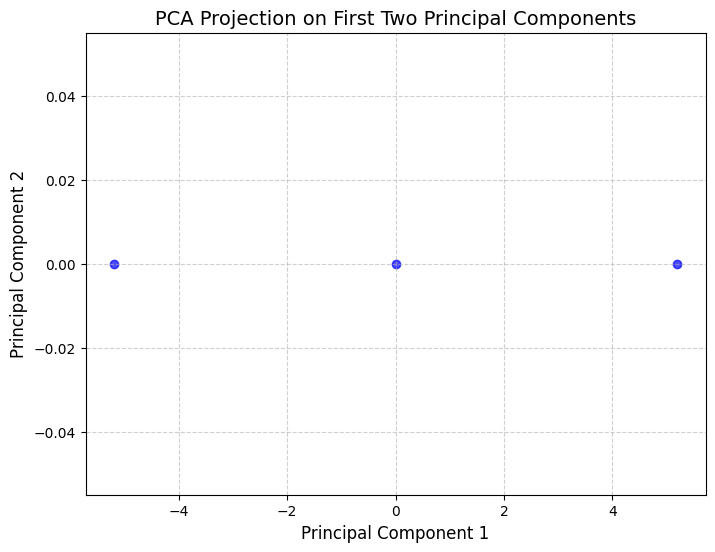

In [15]:
def plot_pca_projection(X_proj: 'Matrix') -> Figure:
    """
    Визуализация проекции данных на первые две главные компоненты.

    Вход: проекция данных X_proj (n×2).
    Выход: объект Figure из Matplotlib.
    """
    # Проверяем, что матрица имеет размерность n×2
    if X_proj.cols != 2:
        raise ValueError("Матрица X_proj должна иметь ровно 2 столбца.")

    # Извлекаем данные
    x_coords = [X_proj[i][0] for i in range(X_proj.rows)]
    y_coords = [X_proj[i][1] for i in range(X_proj.rows)]

    # Создаем новый график
    fig, ax = plt.subplots(figsize=(8, 6))

    # Строим точечный график
    ax.scatter(x_coords, y_coords, color='blue', alpha=0.7)

    # Настройка графика
    ax.set_title("PCA Projection on First Two Principal Components", fontsize=14)
    ax.set_xlabel("Principal Component 1", fontsize=12)
    ax.set_ylabel("Principal Component 2", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Возвращаем объект Figure
    return fig

# Пример использования
if __name__ == "__main__":
    # Пример данных: проекция на первые две главные компоненты
    X_proj_data = [
        [-5.196152422706632, 0.0],
        [0.0, 0.0],
        [5.196152422706632, 0.0]
    ]

    X_proj = Matrix(X_proj_data)

    # Визуализация
    fig = plot_pca_projection(X_proj)
    plt.show()

In [16]:
def reconstruction_error(X_orig: 'Matrix', X_recon: 'Matrix') -> float:
    """
    Вычисление среднеквадратической ошибки восстановления данных.

    Вход:
    X_orig: исходные данные (n×m).
    X_recon: восстановленные данные (n×m).

    Выход: среднеквадратическая ошибка MSE.
    """
    # Проверяем совпадение размерностей
    if X_orig.rows != X_recon.rows or X_orig.cols != X_recon.cols:
        raise ValueError("Матрицы X_orig и X_recon должны иметь одинаковые размерности.")

    n = X_orig.rows
    m = X_orig.cols

    # Вычисляем сумму квадратов разностей
    squared_diff_sum = sum(
        (X_orig[i][j] - X_recon[i][j]) ** 2
        for i in range(n)
        for j in range(m)
    )

    # Вычисляем MSE
    mse = squared_diff_sum / (n * m)

    return mse

# Пример использования
if __name__ == "__main__":
    X_orig_data = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ]

    X_recon_data = [
        [1.1, 2.1, 3.1],
        [4.1, 5.1, 6.1],
        [7.1, 8.1, 9.1]
    ]

    X_orig = Matrix(X_orig_data)
    X_recon = Matrix(X_recon_data)

    mse = reconstruction_error(X_orig, X_recon)

    print(f"Исходные данные:\n{X_orig}")
    print(f"\nВосстановленные данные:\n{X_recon}")
    print(f"\nСреднеквадратическая ошибка (MSE): {mse:.6f}")

Исходные данные:
[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

Восстановленные данные:
[1.1, 2.1, 3.1]
[4.1, 5.1, 6.1]
[7.1, 8.1, 9.1]

Среднеквадратическая ошибка (MSE): 0.010000


In [17]:
def auto_select_k(eigenvalues: List[float], threshold: float = 0.95) -> int:
    """
    Автоматический выбор числа главных компонент на основе порога объяснённой дисперсии.

    Вход:
    eigenvalues: список собственных значений.
    threshold: порог объяснённой дисперсии (по умолчанию 0.95).

    Выход: оптимальное число главных компонент k.
    """
    if not (0 <= threshold <= 1):
        raise ValueError("Порог объяснённой дисперсии должен быть в диапазоне [0, 1].")

    # Сортируем собственные значения по убыванию
    sorted_eigenvalues = sorted(eigenvalues, reverse=True)

    # Вычисляем общую сумму собственных значений
    total_sum = sum(sorted_eigenvalues)

    if total_sum == 0:
        raise ValueError("Общая сумма собственных значений равна нулю.")

    # Вычисляем накопленную объяснённую дисперсию
    cumulative_sum = 0
    for k, eigenvalue in enumerate(sorted_eigenvalues, start=1):
        cumulative_sum += eigenvalue
        explained_variance = cumulative_sum / total_sum
        if explained_variance >= threshold:
            return k

    # Если порог не достигнут, возвращаем максимальное k
    return len(sorted_eigenvalues)

# Пример использования
if __name__ == "__main__":
    eigenvalues = [27.0, 0.0, 0.0]
    threshold = 0.95

    k = auto_select_k(eigenvalues, threshold)

    print(f"Собственные значения: {eigenvalues}")
    print(f"Порог объяснённой дисперсии: {threshold}")
    print(f"Оптимальное число главных компонент: {k}")

Собственные значения: [27.0, 0.0, 0.0]
Порог объяснённой дисперсии: 0.95
Оптимальное число главных компонент: 1


In [18]:
def handle_missing_values(X: 'Matrix') -> 'Matrix':
    """
    Обработка пропущенных значений в данных.

    Вход: матрица данных X (n×m) с возможными NaN.
    Выход: матрица данных X_filled (n×m) без NaN.
    """
    n = X.rows
    m = X.cols

    # Вычисляем среднее значение для каждого столбца, игнорируя NaN
    column_means = []
    for j in range(m):
        column = [X[i][j] for i in range(n) if not math.isnan(X[i][j])]
        mean_value = sum(column) / len(column) if column else 0.0  # Если столбец полностью NaN, среднее = 0
        column_means.append(mean_value)

    # Создаем новую матрицу, заменяя NaN на средние значения
    X_filled_data = [
        [X[i][j] if not math.isnan(X[i][j]) else column_means[j] for j in range(m)]
        for i in range(n)
    ]

    return Matrix(X_filled_data)

# Пример использования
if __name__ == "__main__":
    X_data = [
        [1, 2, float('nan')],
        [4, float('nan'), 6],
        [float('nan'), 8, 9]
    ]

    X = Matrix(X_data)
    X_filled = handle_missing_values(X)

    print("Исходная матрица X:")
    print(X)
    print("\nМатрица X_filled (без NaN):")
    print(X_filled)

Исходная матрица X:
[1, 2, nan]
[4, nan, 6]
[nan, 8, 9]

Матрица X_filled (без NaN):
[1, 2, 7.5]
[4, 5.0, 6]
[2.5, 8, 9]
